In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 2
2023-07-08 20:45:50.086045


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1025.2284)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.2971)tensor(6.6863)tensor(4.8110)tensor(9.3827)tensor(4.5265)tensor(4.5984)tensor(3.6252)tensor(3.6551)tensor(7.9880)tensor(9.2197)tensor(5.6663)tensor(3.3372)tensor(6.9178)tensor(3.9720)tensor(5.3744)tensor(6.1452)tensor(6.2572)tensor(3.8617)tensor(2.9757)tensor(5.0469)tensor(4.5140)tensor(7.1397)tensor(4.8885)tensor(3.3611)tensor(6.4793)tensor(3.2324)tensor(15.0703)tensor(6.1579)tensor(2.7377)tensor(4.4806)tensor(8.1198)tensor(3.6441)tensor(16.4299)tensor(6.2315)tensor(4.6514)tensor(4.3734)tensor(3.1767)tensor(7.8872)tensor(5.6619)tensor(5.5705)tensor(7.2910)tensor(6.4473)tensor(6.5794)tensor(7.0039)tensor(7.6841)tensor(4.1585)tensor(6.3144)tensor(3.2773)tensor(4.6550)tensor(6.9103)tensor(3.3737)tensor(3.9474)tensor(4.6187)tensor(7.3091)tensor(2.7963)tensor(6.5488)tensor(3.1209)tensor(9.9052)tensor(3.1149)tensor(4.4470)tensor(6.8353)tensor(6.7673)tensor(3.8665)tensor(6.4563)tensor(4.9064)tensor(6.2630)tensor(4.0643)tensor(3.8038)tensor(6.1599)tensor(6.4980)tensor(5.0357)tens

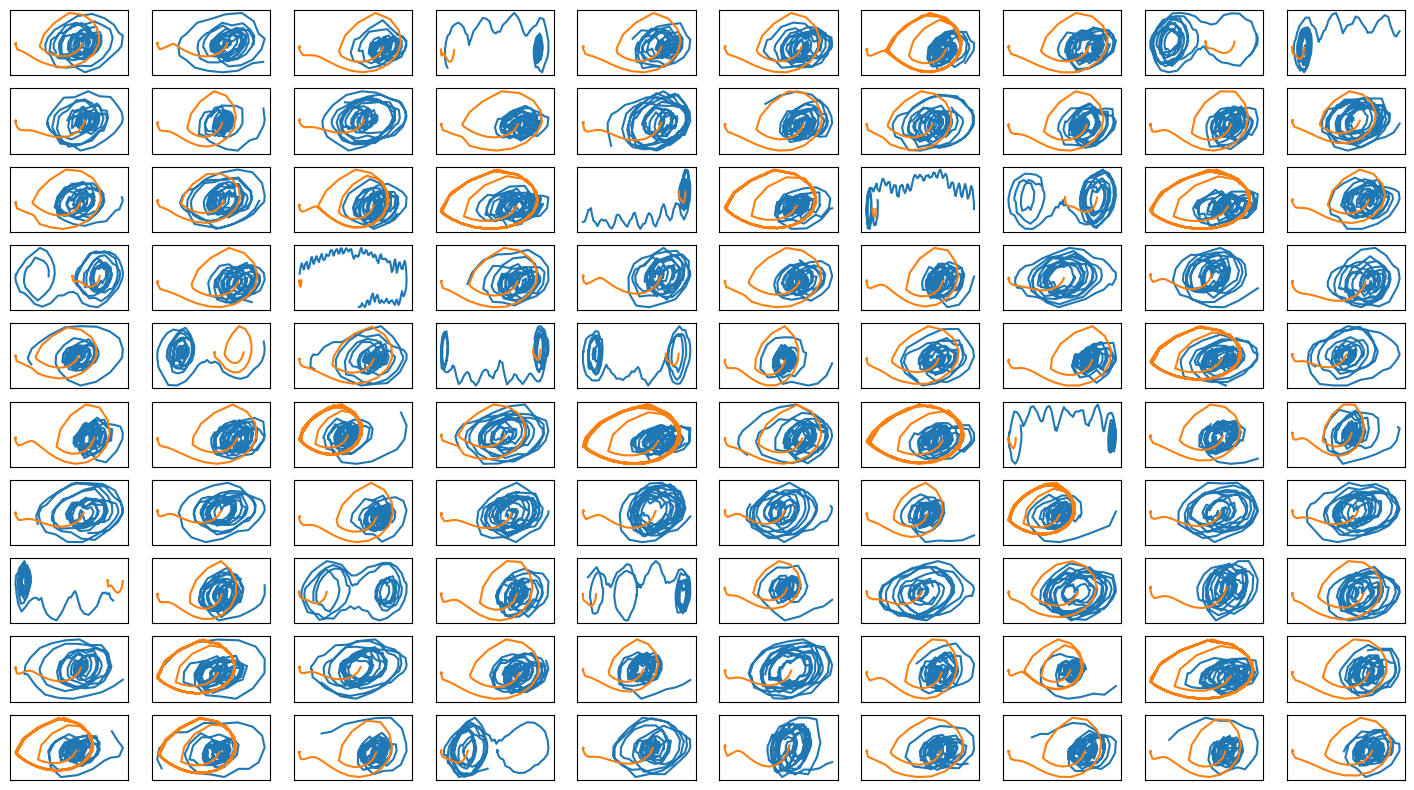

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 173381.25777  validloss 812.55522±0.00000  bestvalidloss 812.55522  last_update 0
train: iter 1  trainloss 46876.85704  validloss 524.10458±0.00000  bestvalidloss 524.10458  last_update 0
train: iter 2  trainloss 551.68711  validloss 469.25419±0.00000  bestvalidloss 469.25419  last_update 0
train: iter 3  trainloss 540.82856  validloss 463.58895±0.00000  bestvalidloss 463.58895  last_update 0
train: iter 4  trainloss 511.99812  validloss 463.86539±0.00000  bestvalidloss 463.58895  last_update 1
train: iter 5  trainloss 517.82593  validloss 455.38229±0.00000  bestvalidloss 455.38229  last_update 0
train: iter 6  trainloss 529.97746  validloss 466.10445±0.00000  bestvalidloss 455.38229  last_update 1
train: iter 7  trainloss 507.55223  validloss 458.78209±0.00000  bestvalidloss 455.38229  last_update 2
train: iter 8  trainloss 514.03948  validloss 450.97170±0.00000  bestvalidloss 450.97170  last_update 0
train: iter 9  trainloss 490.56601  vali

train: iter 78  trainloss -214.19905  validloss -245.97996±0.00000  bestvalidloss -245.97996  last_update 0
train: iter 79  trainloss -233.22497  validloss -209.80657±0.00000  bestvalidloss -245.97996  last_update 1
train: iter 80  trainloss -248.99310  validloss -267.05574±0.00000  bestvalidloss -267.05574  last_update 0
train: iter 81  trainloss -266.40182  validloss -311.39177±0.00000  bestvalidloss -311.39177  last_update 0
train: iter 82  trainloss -252.73958  validloss -208.36436±0.00000  bestvalidloss -311.39177  last_update 1
train: iter 83  trainloss -240.32495  validloss -300.19362±0.00000  bestvalidloss -311.39177  last_update 2
train: iter 84  trainloss -310.30770  validloss -304.80358±0.00000  bestvalidloss -311.39177  last_update 3
train: iter 85  trainloss -288.85463  validloss -358.41146±0.00000  bestvalidloss -358.41146  last_update 0
train: iter 86  trainloss -297.88797  validloss -356.03314±0.00000  bestvalidloss -358.41146  last_update 1
train: iter 87  trainloss -3

train: iter 155  trainloss -536.25446  validloss -569.42108±0.00000  bestvalidloss -597.58211  last_update 11
train: iter 156  trainloss -509.14278  validloss -564.97700±0.00000  bestvalidloss -597.58211  last_update 12
train: iter 157  trainloss -547.52190  validloss -571.08820±0.00000  bestvalidloss -597.58211  last_update 13
train: iter 158  trainloss -492.36135  validloss -573.55786±0.00000  bestvalidloss -597.58211  last_update 14
train: iter 159  trainloss -516.73117  validloss -264.33269±0.00000  bestvalidloss -597.58211  last_update 15
train: iter 160  trainloss -534.99355  validloss -561.33177±0.00000  bestvalidloss -597.58211  last_update 16
train: iter 161  trainloss -530.38628  validloss -566.03891±0.00000  bestvalidloss -597.58211  last_update 17
train: iter 162  trainloss -527.26835  validloss -583.44218±0.00000  bestvalidloss -597.58211  last_update 18
train: iter 163  trainloss -543.36417  validloss -583.64256±0.00000  bestvalidloss -597.58211  last_update 19
train: ite

train: iter 230  trainloss -560.53328  validloss -614.98581±0.00000  bestvalidloss -626.66648  last_update 1
train: iter 231  trainloss -540.58601  validloss -616.55129±0.00000  bestvalidloss -626.66648  last_update 2
train: iter 232  trainloss -487.56768  validloss -560.43897±0.00000  bestvalidloss -626.66648  last_update 3
train: iter 233  trainloss -582.46722  validloss -597.04868±0.00000  bestvalidloss -626.66648  last_update 4
train: iter 234  trainloss -564.41962  validloss -621.89536±0.00000  bestvalidloss -626.66648  last_update 5
train: iter 235  trainloss -564.46752  validloss -585.49390±0.00000  bestvalidloss -626.66648  last_update 6
train: iter 236  trainloss -594.36974  validloss -624.93375±0.00000  bestvalidloss -626.66648  last_update 7
train: iter 237  trainloss -595.71824  validloss -613.15385±0.00000  bestvalidloss -626.66648  last_update 8
train: iter 238  trainloss -563.54542  validloss -625.60612±0.00000  bestvalidloss -626.66648  last_update 9
train: iter 239  tr

train: iter 306  trainloss -592.20600  validloss -598.04275±0.00000  bestvalidloss -651.57630  last_update 18
train: iter 307  trainloss -612.41941  validloss -646.11215±0.00000  bestvalidloss -651.57630  last_update 19
train: iter 308  trainloss -605.90494  validloss -650.71387±0.00000  bestvalidloss -651.57630  last_update 20
train: iter 309  trainloss -607.36386  validloss -640.16515±0.00000  bestvalidloss -651.57630  last_update 21
train: iter 310  trainloss -592.63018  validloss -565.97804±0.00000  bestvalidloss -651.57630  last_update 22
train: iter 311  trainloss -616.92265  validloss -655.68745±0.00000  bestvalidloss -655.68745  last_update 0
train: iter 312  trainloss -603.04450  validloss -653.46908±0.00000  bestvalidloss -655.68745  last_update 1
train: iter 313  trainloss -605.99410  validloss -626.09342±0.00000  bestvalidloss -655.68745  last_update 2
train: iter 314  trainloss -598.85682  validloss -643.91961±0.00000  bestvalidloss -655.68745  last_update 3
train: iter 31

train: iter 381  trainloss -603.58666  validloss -673.00993±0.00000  bestvalidloss -673.00993  last_update 0
train: iter 382  trainloss -603.85676  validloss -662.59568±0.00000  bestvalidloss -673.00993  last_update 1
train: iter 383  trainloss -603.25667  validloss -646.29337±0.00000  bestvalidloss -673.00993  last_update 2
train: iter 384  trainloss -607.70760  validloss -662.69752±0.00000  bestvalidloss -673.00993  last_update 3
train: iter 385  trainloss -616.96718  validloss -647.68828±0.00000  bestvalidloss -673.00993  last_update 4
train: iter 386  trainloss -616.13364  validloss -654.12532±0.00000  bestvalidloss -673.00993  last_update 5
train: iter 387  trainloss -616.29161  validloss -649.42031±0.00000  bestvalidloss -673.00993  last_update 6
train: iter 388  trainloss -622.13004  validloss -657.03572±0.00000  bestvalidloss -673.00993  last_update 7
train: iter 389  trainloss -617.81275  validloss -673.12820±0.00000  bestvalidloss -673.12820  last_update 0
train: iter 390  tr

train: iter 457  trainloss -629.16791  validloss -667.28214±0.00000  bestvalidloss -693.30629  last_update 13
train: iter 458  trainloss -619.58926  validloss -608.57625±0.00000  bestvalidloss -693.30629  last_update 14
train: iter 459  trainloss -602.90495  validloss -624.95810±0.00000  bestvalidloss -693.30629  last_update 15
train: iter 460  trainloss -617.48581  validloss -627.21792±0.00000  bestvalidloss -693.30629  last_update 16
train: iter 461  trainloss -617.37927  validloss -671.26860±0.00000  bestvalidloss -693.30629  last_update 17
train: iter 462  trainloss -633.43273  validloss -676.39869±0.00000  bestvalidloss -693.30629  last_update 18
train: iter 463  trainloss -633.89362  validloss -682.16680±0.00000  bestvalidloss -693.30629  last_update 19
train: iter 464  trainloss -602.32433  validloss -677.04148±0.00000  bestvalidloss -693.30629  last_update 20
train: iter 465  trainloss -638.71984  validloss -679.08911±0.00000  bestvalidloss -693.30629  last_update 21
train: ite

train: iter 532  trainloss -657.17454  validloss -700.79109±0.00000  bestvalidloss -707.66866  last_update 9
train: iter 533  trainloss -652.20928  validloss -673.25787±0.00000  bestvalidloss -707.66866  last_update 10
train: iter 534  trainloss -442.90962  validloss -690.41258±0.00000  bestvalidloss -707.66866  last_update 11
train: iter 535  trainloss -619.44950  validloss -624.61136±0.00000  bestvalidloss -707.66866  last_update 12
train: iter 536  trainloss -632.16779  validloss -693.02144±0.00000  bestvalidloss -707.66866  last_update 13
train: iter 537  trainloss -625.19219  validloss -690.46907±0.00000  bestvalidloss -707.66866  last_update 14
train: iter 538  trainloss -638.73530  validloss -680.30752±0.00000  bestvalidloss -707.66866  last_update 15
train: iter 539  trainloss -623.94956  validloss -685.80806±0.00000  bestvalidloss -707.66866  last_update 16
train: iter 540  trainloss -631.78724  validloss -702.58003±0.00000  bestvalidloss -707.66866  last_update 17
train: iter

train: iter 607  trainloss -661.90553  validloss -724.43255±0.00000  bestvalidloss -739.88340  last_update 27
train: iter 608  trainloss -646.25144  validloss -714.02875±0.00000  bestvalidloss -739.88340  last_update 28
train: iter 609  trainloss -662.96350  validloss -735.87428±0.00000  bestvalidloss -739.88340  last_update 29
train: iter 610  trainloss -648.26060  validloss -726.94906±0.00000  bestvalidloss -739.88340  last_update 30
train: iter 611  trainloss -662.94874  validloss -718.87476±0.00000  bestvalidloss -739.88340  last_update 31
train: iter 612  trainloss -590.53497  validloss -727.91637±0.00000  bestvalidloss -739.88340  last_update 32
train: iter 613  trainloss -582.30250  validloss -698.25016±0.00000  bestvalidloss -739.88340  last_update 33
train: iter 614  trainloss -645.18740  validloss -712.30375±0.00000  bestvalidloss -739.88340  last_update 34
train: iter 615  trainloss -639.11094  validloss -708.16379±0.00000  bestvalidloss -739.88340  last_update 35
train: ite

train: iter 682  trainloss -639.52427  validloss -738.91494±0.00000  bestvalidloss -756.80129  last_update 10
train: iter 683  trainloss -641.15103  validloss -713.34689±0.00000  bestvalidloss -756.80129  last_update 11
train: iter 684  trainloss -658.66186  validloss -720.26488±0.00000  bestvalidloss -756.80129  last_update 12
train: iter 685  trainloss -652.55121  validloss -745.11420±0.00000  bestvalidloss -756.80129  last_update 13
train: iter 686  trainloss -647.80146  validloss -710.13631±0.00000  bestvalidloss -756.80129  last_update 14
train: iter 687  trainloss -651.56829  validloss -691.13605±0.00000  bestvalidloss -756.80129  last_update 15
train: iter 688  trainloss -670.19388  validloss -677.59414±0.00000  bestvalidloss -756.80129  last_update 16
train: iter 689  trainloss -661.13785  validloss -735.82388±0.00000  bestvalidloss -756.80129  last_update 17
train: iter 690  trainloss -662.70249  validloss -745.34209±0.00000  bestvalidloss -756.80129  last_update 18
train: ite

train: iter 758  trainloss -622.81001  validloss -734.38142±0.00000  bestvalidloss -762.23262  last_update 8
train: iter 759  trainloss -669.76173  validloss -729.24436±0.00000  bestvalidloss -762.23262  last_update 9
train: iter 760  trainloss -668.03843  validloss -750.73141±0.00000  bestvalidloss -762.23262  last_update 10
train: iter 761  trainloss -644.38440  validloss -719.57213±0.00000  bestvalidloss -762.23262  last_update 11
train: iter 762  trainloss -657.68788  validloss -692.65112±0.00000  bestvalidloss -762.23262  last_update 12
train: iter 763  trainloss -666.46567  validloss -717.95863±0.00000  bestvalidloss -762.23262  last_update 13
train: iter 764  trainloss -681.60350  validloss -749.15406±0.00000  bestvalidloss -762.23262  last_update 14
train: iter 765  trainloss -675.26503  validloss -751.93221±0.00000  bestvalidloss -762.23262  last_update 15
train: iter 766  trainloss -668.85853  validloss -741.90395±0.00000  bestvalidloss -762.23262  last_update 16
train: iter 

train: iter 833  trainloss -693.15038  validloss -718.87345±0.00000  bestvalidloss -774.10230  last_update 2
train: iter 834  trainloss -604.08144  validloss -732.86991±0.00000  bestvalidloss -774.10230  last_update 3
train: iter 835  trainloss -645.94192  validloss -612.31352±0.00000  bestvalidloss -774.10230  last_update 4
train: iter 836  trainloss -665.66988  validloss -738.31042±0.00000  bestvalidloss -774.10230  last_update 5
train: iter 837  trainloss -660.25372  validloss -729.14652±0.00000  bestvalidloss -774.10230  last_update 6
train: iter 838  trainloss -677.62268  validloss -750.22446±0.00000  bestvalidloss -774.10230  last_update 7
train: iter 839  trainloss -679.94427  validloss -741.56829±0.00000  bestvalidloss -774.10230  last_update 8
train: iter 840  trainloss -661.87181  validloss -766.94356±0.00000  bestvalidloss -774.10230  last_update 9
train: iter 841  trainloss -678.89399  validloss -741.99922±0.00000  bestvalidloss -774.10230  last_update 10
train: iter 842  t

train: iter 908  trainloss -672.28611  validloss -610.34952±0.00000  bestvalidloss -776.77509  last_update 17
train: iter 909  trainloss -689.63017  validloss -755.21497±0.00000  bestvalidloss -776.77509  last_update 18
train: iter 910  trainloss -667.93352  validloss -747.00203±0.00000  bestvalidloss -776.77509  last_update 19
train: iter 911  trainloss -684.35623  validloss -739.68176±0.00000  bestvalidloss -776.77509  last_update 20
train: iter 912  trainloss -699.94604  validloss -766.34631±0.00000  bestvalidloss -776.77509  last_update 21
train: iter 913  trainloss -689.25010  validloss -764.16329±0.00000  bestvalidloss -776.77509  last_update 22
train: iter 914  trainloss -596.01706  validloss -748.91584±0.00000  bestvalidloss -776.77509  last_update 23
train: iter 915  trainloss -560.41441  validloss -575.05119±0.00000  bestvalidloss -776.77509  last_update 24
train: iter 916  trainloss -639.16424  validloss -703.19999±0.00000  bestvalidloss -776.77509  last_update 25
train: ite

train: iter 983  trainloss -677.53256  validloss -727.15676±0.00000  bestvalidloss -780.40703  last_update 4
train: iter 984  trainloss -676.47517  validloss -741.61464±0.00000  bestvalidloss -780.40703  last_update 5
train: iter 985  trainloss -689.02327  validloss -749.95391±0.00000  bestvalidloss -780.40703  last_update 6
train: iter 986  trainloss -691.95231  validloss -777.73292±0.00000  bestvalidloss -780.40703  last_update 7
train: iter 987  trainloss -699.01130  validloss -718.59308±0.00000  bestvalidloss -780.40703  last_update 8
train: iter 988  trainloss -692.01876  validloss -766.11892±0.00000  bestvalidloss -780.40703  last_update 9
train: iter 989  trainloss -698.18908  validloss -761.88719±0.00000  bestvalidloss -780.40703  last_update 10
train: iter 990  trainloss -694.73065  validloss -774.06564±0.00000  bestvalidloss -780.40703  last_update 11
train: iter 991  trainloss -699.66134  validloss -775.42407±0.00000  bestvalidloss -780.40703  last_update 12
train: iter 992 

train: iter 1059  trainloss -690.29820  validloss -740.02508±0.00000  bestvalidloss -789.94848  last_update 63
train: iter 1060  trainloss -687.31364  validloss -761.47700±0.00000  bestvalidloss -789.94848  last_update 64
train: iter 1061  trainloss -683.72252  validloss -769.63492±0.00000  bestvalidloss -789.94848  last_update 65
train: iter 1062  trainloss -697.58674  validloss -739.46250±0.00000  bestvalidloss -789.94848  last_update 66
train: iter 1063  trainloss -696.25274  validloss -775.88741±0.00000  bestvalidloss -789.94848  last_update 67
train: iter 1064  trainloss -696.11270  validloss -766.49662±0.00000  bestvalidloss -789.94848  last_update 68
train: iter 1065  trainloss -693.75316  validloss -778.31162±0.00000  bestvalidloss -789.94848  last_update 69
train: iter 1066  trainloss -690.55897  validloss -736.50484±0.00000  bestvalidloss -789.94848  last_update 70
train: iter 1067  trainloss -698.18418  validloss -775.09200±0.00000  bestvalidloss -789.94848  last_update 71
t

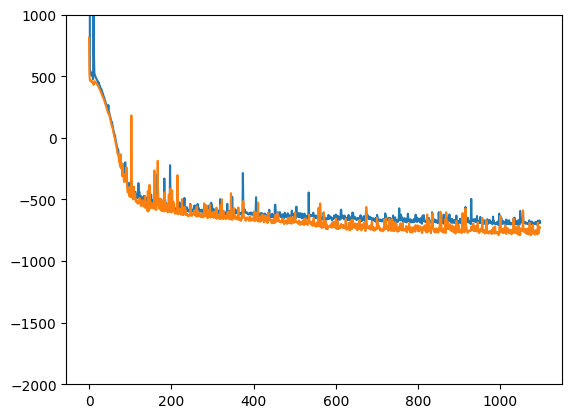

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


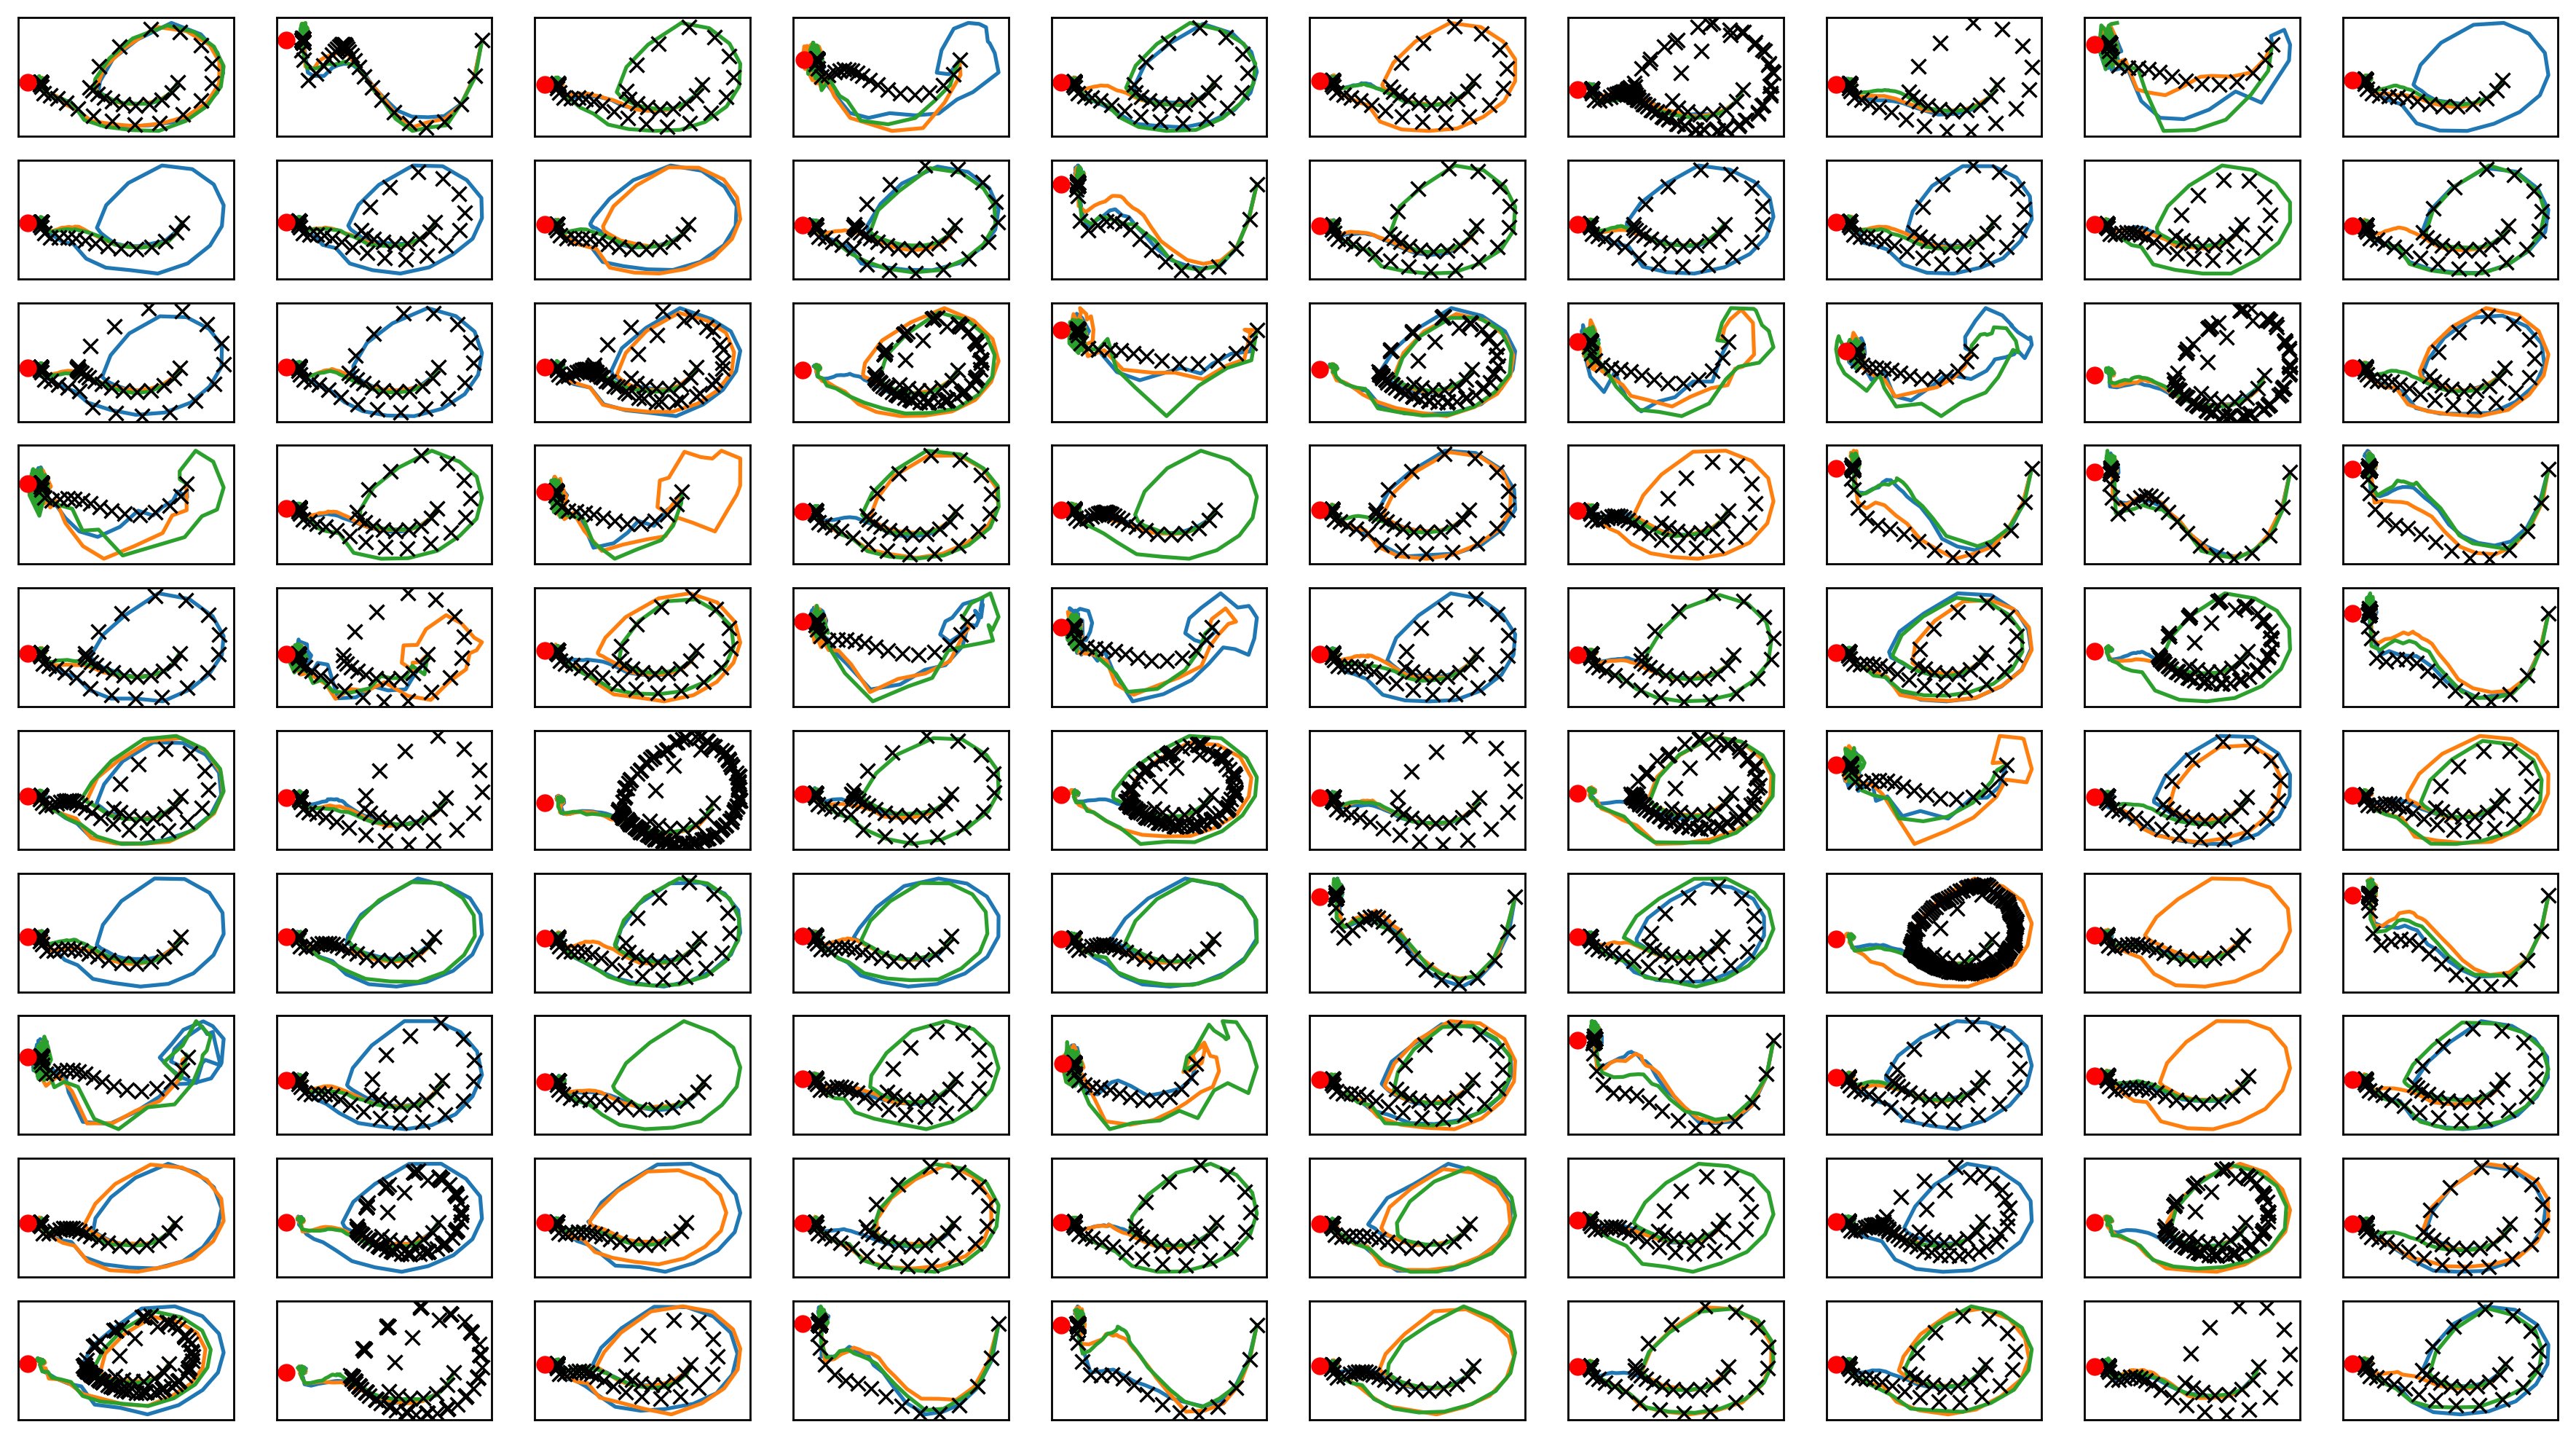

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

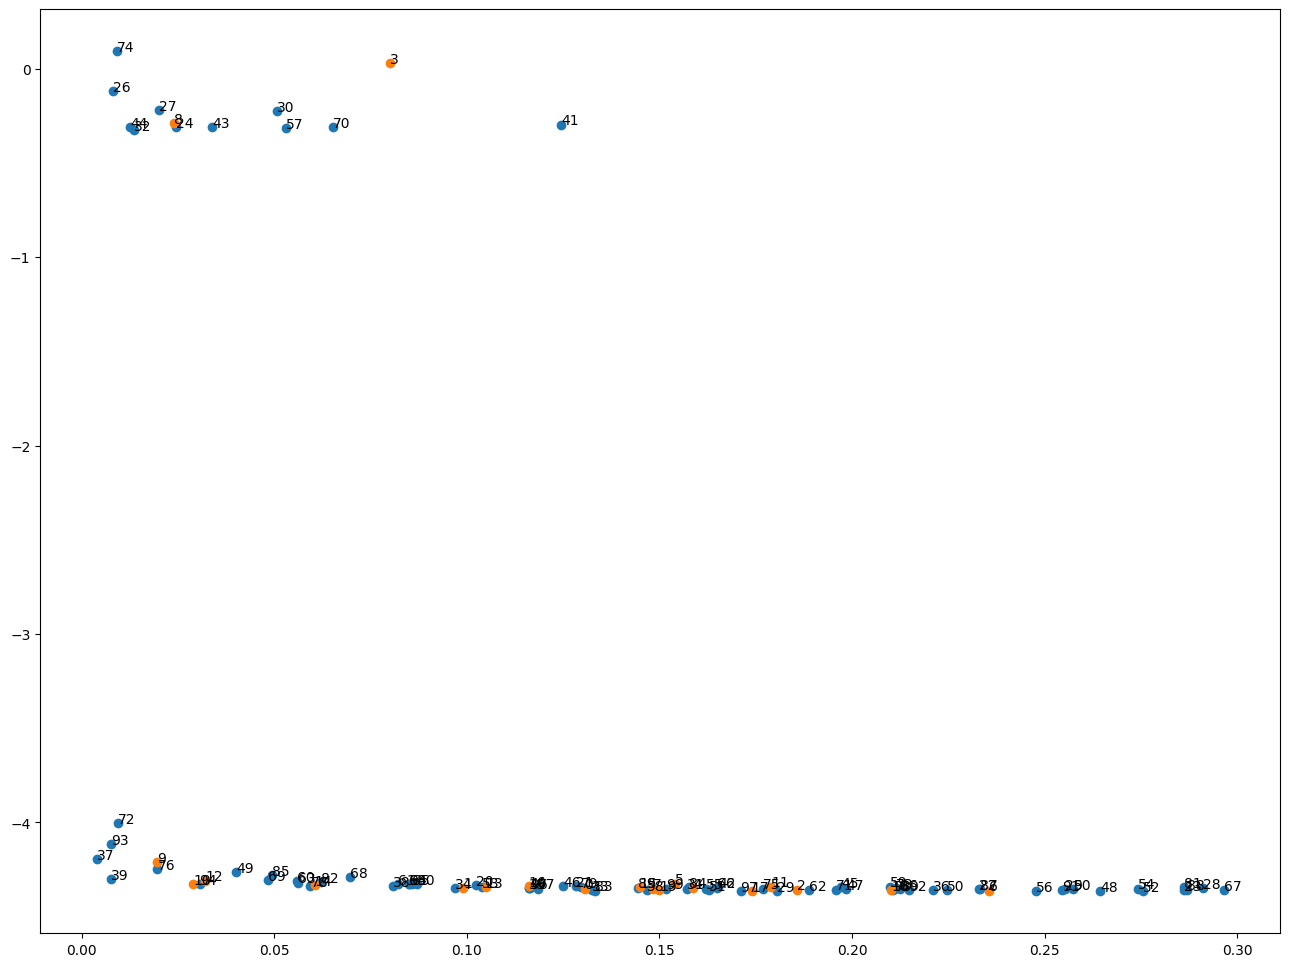

[0.13059672 0.09910045 0.18578129 0.08004818 0.15874263 0.15407344
 0.23560054 0.14827105 0.02389364 0.01958595 0.02895927 0.17902359
 0.03208371 0.10494789 0.06052297 0.14492095 0.1160678  0.17400125
 0.2102257  0.15000251 0.1024841  0.12826379 0.23296776 0.28612267
 0.02462848 0.25525515 0.00816071 0.02014331 0.29117409 0.18054514
 0.05076763 0.15722006 0.01370369 0.13240648 0.0970624  0.11606697
 0.22102412 0.0039052  0.08081664 0.00766528 0.11625703 0.12447175
 0.16529337 0.03383286 0.01253931 0.19725372 0.12502603 0.1984444
 0.26449567 0.04018626 0.22463336 0.16300357 0.27553759 0.10387137
 0.27417464 0.16205745 0.24787495 0.05301365 0.14677985 0.20985619
 0.05598814 0.08221778 0.18880792 0.05618596 0.08512674 0.08568112
 0.16484905 0.29655291 0.06963548 0.04843997 0.06522073 0.19590615
 0.00937427 0.21138825 0.00917684 0.1769346  0.0196991  0.11854523
 0.05940813 0.12971673 0.08712802 0.28609799 0.06211495 0.13337228
 0.15771997 0.04932573 0.21239135 0.2331309  0.28702428 0.14443

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


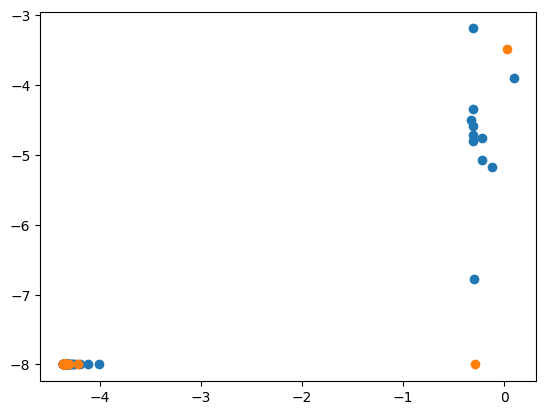

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.60703  validloss 9.40386±0.00000  bestvalidloss 9.40386  last_update 0
train: iter 1  trainloss 7.87894  validloss 8.56042±0.00000  bestvalidloss 8.56042  last_update 0
train: iter 2  trainloss 7.25846  validloss 7.87228±0.00000  bestvalidloss 7.87228  last_update 0
train: iter 3  trainloss 6.73276  validloss 7.25527±0.00000  bestvalidloss 7.25527  last_update 0
train: iter 4  trainloss 6.25293  validloss 6.69882±0.00000  bestvalidloss 6.69882  last_update 0
train: iter 5  trainloss 5.85082  validloss 6.27974±0.00000  bestvalidloss 6.27974  last_update 0
train: iter 6  trainloss 5.49589  validloss 5.86817±0.00000  bestvalidloss 5.86817  last_update 0
train: iter 7  trainloss 5.18214  validloss 5.54872±0.00000  bestvalidloss 5.54872  last_update 0
train: iter 8  trainloss 4.90365  validloss 5.21399±0.00000  bestvalidloss 5.21399  last_update 0
train: iter 9  trainloss 4.63659  validloss 4.92734±0.00000  bestvalidloss 4.92734  last_update 0
train: iter 10  trai

train: iter 91  trainloss 1.79390  validloss 1.73482±0.00000  bestvalidloss 1.71596  last_update 3
train: iter 92  trainloss 1.78898  validloss 1.74259±0.00000  bestvalidloss 1.71596  last_update 4
train: iter 93  trainloss 1.78473  validloss 1.74119±0.00000  bestvalidloss 1.71596  last_update 5
train: iter 94  trainloss 1.77440  validloss 1.71533±0.00000  bestvalidloss 1.71533  last_update 0
train: iter 95  trainloss 1.77959  validloss 1.71583±0.00000  bestvalidloss 1.71533  last_update 1
train: iter 96  trainloss 1.77355  validloss 1.68068±0.00000  bestvalidloss 1.68068  last_update 0
train: iter 97  trainloss 1.78072  validloss 1.69881±0.00000  bestvalidloss 1.68068  last_update 1
train: iter 98  trainloss 1.77432  validloss 1.70439±0.00000  bestvalidloss 1.68068  last_update 2
train: iter 99  trainloss 1.77568  validloss 1.68373±0.00000  bestvalidloss 1.68068  last_update 3
train: iter 100  trainloss 1.77160  validloss 1.69737±0.00000  bestvalidloss 1.68068  last_update 4
train: it

train: iter 175  trainloss 1.76824  validloss 1.64348±0.00000  bestvalidloss 1.63038  last_update 40
train: iter 176  trainloss 1.77010  validloss 1.67456±0.00000  bestvalidloss 1.63038  last_update 41
train: iter 177  trainloss 1.77682  validloss 1.68358±0.00000  bestvalidloss 1.63038  last_update 42
train: iter 178  trainloss 1.76493  validloss 1.64259±0.00000  bestvalidloss 1.63038  last_update 43
train: iter 179  trainloss 1.75989  validloss 1.68903±0.00000  bestvalidloss 1.63038  last_update 44
train: iter 180  trainloss 1.75918  validloss 1.66507±0.00000  bestvalidloss 1.63038  last_update 45
train: iter 181  trainloss 1.77553  validloss 1.69303±0.00000  bestvalidloss 1.63038  last_update 46
train: iter 182  trainloss 1.76748  validloss 1.67115±0.00000  bestvalidloss 1.63038  last_update 47
train: iter 183  trainloss 1.75563  validloss 1.66691±0.00000  bestvalidloss 1.63038  last_update 48
train: iter 184  trainloss 1.76782  validloss 1.65427±0.00000  bestvalidloss 1.63038  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.7504,  0.7172], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 16.44872  validloss 22.01611±0.00000  bestvalidloss 22.01611  last_update 0
train: iter 1  trainloss 8.75943  validloss 13.58465±0.00000  bestvalidloss 13.58465  last_update 0
train: iter 2  trainloss 4.90116  validloss 6.34135±0.00000  bestvalidloss 6.34135  last_update 0
train: iter 3  trainloss 3.74583  validloss 4.10752±0.00000  bestvalidloss 4.10752  last_update 0
train: iter 4  trainloss 3.20239  validloss 3.26942±0.00000  bestvalidloss 3.26942  last_update 0
train: iter 5  trainloss 2.89525  validloss 2.69144±0.00000  bestvalidloss 2.69144  last_update 0
train: iter 6  trainloss 2.56724  validloss 2.32807±0.00000  bestvalidloss 2.32807  last_update 0
train: iter 7  trainloss 2.24951  validloss 2.04663±0.00000  bestvalidloss 2.04663  last_update 0
train: iter 8  trainloss 2.01815  validloss 1.78764±0.00000  bestvalidloss 1.78764  last_update 0
train: iter 9  trainloss 1.87343  validloss 1.59940±0.00000  bestvalidloss 1.59940  last_update 0
train: iter 10 

train: iter 83  trainloss 1.59537  validloss 1.36924±0.00000  bestvalidloss 1.30727  last_update 15
train: iter 84  trainloss 1.61828  validloss 1.35327±0.00000  bestvalidloss 1.30727  last_update 16
train: iter 85  trainloss 1.59824  validloss 1.33869±0.00000  bestvalidloss 1.30727  last_update 17
train: iter 86  trainloss 1.59268  validloss 1.38069±0.00000  bestvalidloss 1.30727  last_update 18
train: iter 87  trainloss 1.62504  validloss 1.28819±0.00000  bestvalidloss 1.28819  last_update 0
train: iter 88  trainloss 1.59535  validloss 1.34111±0.00000  bestvalidloss 1.28819  last_update 1
train: iter 89  trainloss 1.59842  validloss 1.43140±0.00000  bestvalidloss 1.28819  last_update 2
train: iter 90  trainloss 1.62373  validloss 1.31821±0.00000  bestvalidloss 1.28819  last_update 3
train: iter 91  trainloss 1.59764  validloss 1.33038±0.00000  bestvalidloss 1.28819  last_update 4
train: iter 92  trainloss 1.63208  validloss 1.37205±0.00000  bestvalidloss 1.28819  last_update 5
train:

train: iter 167  trainloss 1.61798  validloss 1.32741±0.00000  bestvalidloss 1.26192  last_update 1
train: iter 168  trainloss 1.59723  validloss 1.34539±0.00000  bestvalidloss 1.26192  last_update 2
train: iter 169  trainloss 1.58763  validloss 1.28925±0.00000  bestvalidloss 1.26192  last_update 3
train: iter 170  trainloss 1.65576  validloss 1.32275±0.00000  bestvalidloss 1.26192  last_update 4
train: iter 171  trainloss 1.59020  validloss 1.49730±0.00000  bestvalidloss 1.26192  last_update 5
train: iter 172  trainloss 1.61904  validloss 1.36761±0.00000  bestvalidloss 1.26192  last_update 6
train: iter 173  trainloss 1.60424  validloss 1.34912±0.00000  bestvalidloss 1.26192  last_update 7
train: iter 174  trainloss 1.57816  validloss 1.28683±0.00000  bestvalidloss 1.26192  last_update 8
train: iter 175  trainloss 1.65543  validloss 1.29516±0.00000  bestvalidloss 1.26192  last_update 9
train: iter 176  trainloss 1.62658  validloss 1.25394±0.00000  bestvalidloss 1.25394  last_update 0


train: iter 250  trainloss 1.57944  validloss 1.22652±0.00000  bestvalidloss 1.22652  last_update 0
train: iter 251  trainloss 1.56466  validloss 1.29669±0.00000  bestvalidloss 1.22652  last_update 1
train: iter 252  trainloss 1.54507  validloss 1.28751±0.00000  bestvalidloss 1.22652  last_update 2
train: iter 253  trainloss 1.52624  validloss 1.22435±0.00000  bestvalidloss 1.22435  last_update 0
train: iter 254  trainloss 1.56270  validloss 1.30314±0.00000  bestvalidloss 1.22435  last_update 1
train: iter 255  trainloss 1.62075  validloss 1.37153±0.00000  bestvalidloss 1.22435  last_update 2
train: iter 256  trainloss 1.58323  validloss 1.29846±0.00000  bestvalidloss 1.22435  last_update 3
train: iter 257  trainloss 1.54388  validloss 1.26294±0.00000  bestvalidloss 1.22435  last_update 4
train: iter 258  trainloss 1.56540  validloss 1.30103±0.00000  bestvalidloss 1.22435  last_update 5
train: iter 259  trainloss 1.56563  validloss 1.28934±0.00000  bestvalidloss 1.22435  last_update 6


train: iter 332  trainloss 1.47997  validloss 1.14487±0.00000  bestvalidloss 1.09430  last_update 9
train: iter 333  trainloss 1.48970  validloss 1.19644±0.00000  bestvalidloss 1.09430  last_update 10
train: iter 334  trainloss 1.53391  validloss 1.17796±0.00000  bestvalidloss 1.09430  last_update 11
train: iter 335  trainloss 1.51477  validloss 1.16997±0.00000  bestvalidloss 1.09430  last_update 12
train: iter 336  trainloss 1.47791  validloss 1.18793±0.00000  bestvalidloss 1.09430  last_update 13
train: iter 337  trainloss 1.48801  validloss 1.17380±0.00000  bestvalidloss 1.09430  last_update 14
train: iter 338  trainloss 1.48883  validloss 1.22982±0.00000  bestvalidloss 1.09430  last_update 15
train: iter 339  trainloss 1.48166  validloss 1.13889±0.00000  bestvalidloss 1.09430  last_update 16
train: iter 340  trainloss 1.48731  validloss 1.10094±0.00000  bestvalidloss 1.09430  last_update 17
train: iter 341  trainloss 1.46238  validloss 1.16351±0.00000  bestvalidloss 1.09430  last_u

train: iter 415  trainloss 1.46651  validloss 1.23509±0.00000  bestvalidloss 1.08054  last_update 13
train: iter 416  trainloss 1.48438  validloss 1.19616±0.00000  bestvalidloss 1.08054  last_update 14
train: iter 417  trainloss 1.52937  validloss 1.26827±0.00000  bestvalidloss 1.08054  last_update 15
train: iter 418  trainloss 1.48820  validloss 1.26874±0.00000  bestvalidloss 1.08054  last_update 16
train: iter 419  trainloss 1.52784  validloss 1.14749±0.00000  bestvalidloss 1.08054  last_update 17
train: iter 420  trainloss 1.46315  validloss 1.23261±0.00000  bestvalidloss 1.08054  last_update 18
train: iter 421  trainloss 1.53442  validloss 1.14338±0.00000  bestvalidloss 1.08054  last_update 19
train: iter 422  trainloss 1.52670  validloss 1.20043±0.00000  bestvalidloss 1.08054  last_update 20
train: iter 423  trainloss 1.47480  validloss 1.19129±0.00000  bestvalidloss 1.08054  last_update 21
train: iter 424  trainloss 1.51649  validloss 1.23004±0.00000  bestvalidloss 1.08054  last_

train: iter 499  trainloss 1.52291  validloss 1.14303±0.00000  bestvalidloss 1.05762  last_update 36
train: iter 500  trainloss 1.48695  validloss 1.17842±0.00000  bestvalidloss 1.05762  last_update 37
train: iter 501  trainloss 1.50454  validloss 1.15218±0.00000  bestvalidloss 1.05762  last_update 38
train: iter 502  trainloss 1.51438  validloss 1.14429±0.00000  bestvalidloss 1.05762  last_update 39
train: iter 503  trainloss 1.48222  validloss 1.14777±0.00000  bestvalidloss 1.05762  last_update 40
train: iter 504  trainloss 1.49531  validloss 1.12039±0.00000  bestvalidloss 1.05762  last_update 41
train: iter 505  trainloss 1.45818  validloss 1.10163±0.00000  bestvalidloss 1.05762  last_update 42
train: iter 506  trainloss 1.49575  validloss 1.21567±0.00000  bestvalidloss 1.05762  last_update 43
train: iter 507  trainloss 1.49305  validloss 1.18236±0.00000  bestvalidloss 1.05762  last_update 44
train: iter 508  trainloss 1.49238  validloss 1.17634±0.00000  bestvalidloss 1.05762  last_

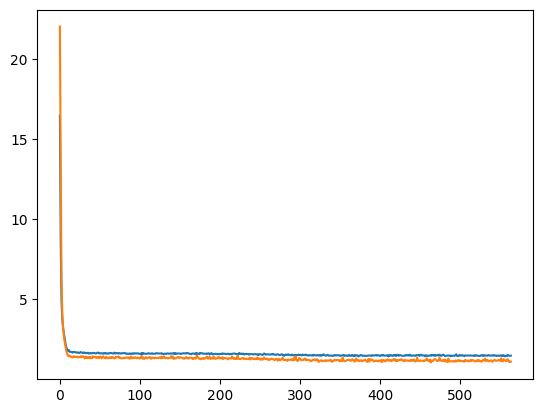

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-3.0333)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-2.5403)


In [21]:
print(vi.h_min_tilde)

-5.8712893


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.048315758678373
tensor([1.2925])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

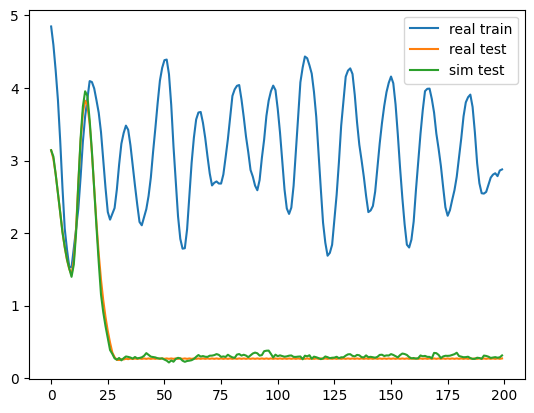

encoder [-4.360783 -8.      ]
initial_belief tensor([-3.7504,  0.7172])
real train tensor([-4.3735, -8.0025])
real test tensor([-0.3172, -4.3534])
sim tensor([-4.3901, -7.9935])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.346938775510204


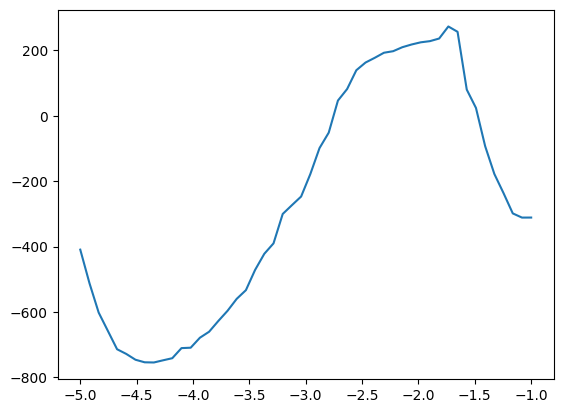

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.4338141436081475
tensor([-1.1499])
